In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.rcParams.update({'font.size' : 14})

In [2]:
df = pd.read_csv('filtered_customer_booking.csv', index_col = 0 )

In [3]:
df = df.reset_index(drop=True)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


We will one hot encode the categorical data.
"One-hot encoding" is a data preprocessing technique used in machine learning and data analysis to convert categorical data (data that represents categories or labels) into a numerical format that can be used for modeling. It's commonly applied to CSV files or other tabular data.

## Model

In [4]:
df_final = df

In [5]:
from sklearn.preprocessing import OneHotEncoder

# Create the instance of the OHE
encoder = OneHotEncoder(handle_unknown= 'ignore')
# handle_unknown='ignore': This parameter configuration specifies how the encoder should handle new or unknown categories that it hasn't seen during the training phase.

#one hot encode 'sales_channel'
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={ 0 : 'Internet', 1 : 'Mobile'})
df_final = df_final.join(encoder_df)

In [6]:
#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[['trip_type']]).toarray())
encoder_df = encoder_df.rename(columns = {0 : 'Round Trip', 1 : 'One Way Trip', 2 : 'Circle Trip'})
df_final = df_final.join(encoder_df)

In [7]:
# We can now drop categorical columns
df_final = df_final.drop(columns = ['trip_type', 'sales_channel', 'booking_origin', 'route'])
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,Round Trip,One Way Trip,Circle Trip
0,2,262,19,7,6,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,0,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0


In [8]:
# We will store the column 'booking_complete' for supervised learning
label = df.booking_complete
df_final = df_final.drop(columns =['booking_complete'])
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,Round Trip,One Way Trip,Circle Trip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizing the values
Scaling numerical features to a common range or distribution. This ensures that all features have a consistent scale, preventing any single feature from dominating the learning process due to its magnitude.

In [9]:
from sklearn.preprocessing import StandardScaler

#create a scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [10]:
# create a dataframe of the scaled data
scaled_df = pd.DataFrame(data = scaled_df, columns = df_final.columns)

In [11]:
# add labels back to the final df
scaled_df['label'] = label

In [12]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,Round Trip,One Way Trip,Circle Trip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


## Correlation matrix
It is a table showing the correlations between numerical features. It helps identify how features are related, whether positively or negatively, and is useful for feature selection and understanding data patterns.

<AxesSubplot:>

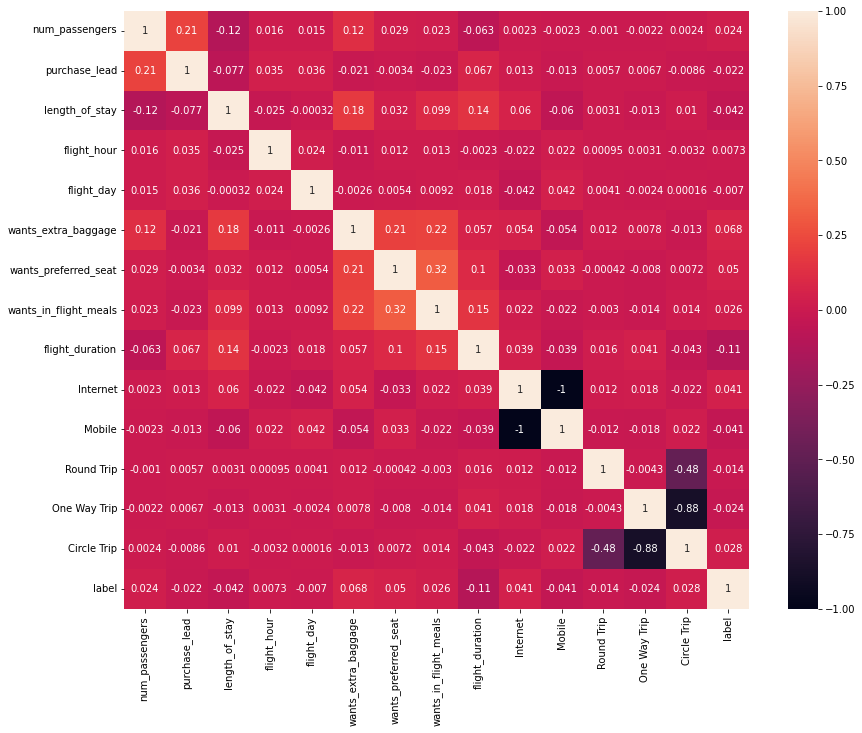

In [13]:
corr = scaled_df.corr()
plt.figure(figsize= (14,11))
# plot the heatmap
sns.heatmap(corr, annot=True)

# Splitting Train and Test Data


In [39]:
from sklearn.model_selection import train_test_split

x = scaled_df.iloc[:,:-1]
y = scaled_df['label']

x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size= 0.2, random_state = 42) #remove the 'random_state = 42' for randomness

Regression is used when you want to predict a continuous numeric value.  
Classification is used when you want to categorize data into classes or groups.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [46]:
# Create functions to fit and predict the values of whether customer would complete the booking.
# Also functions with metrics to evaluate the model prediction.

def model_fit_predict(model, x, y, x_predict):
    model.fit(x,y)
    return model.predict(x_predict)

# Random Forest Classifier


In [42]:
# create the instance of the classifier and fit the traning data

model_rfc = RandomForestClassifier(max_depth= 50 , min_samples_split=5 , random_state=0)

### Checking training accuracy

In [44]:
# y_pred_train = model_fit_predict(model_rfc, x_train, y_train, x_train)
model_rfc.fit(x_train,y_train)
y_pred_train = model_rfc.predict(x_train)
# extract the unique predicted values from y_pred_train and store them in a set.
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),3) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),3) 

#accuracy score for training data
rec = round(recall_score(y_train, y_pred_train),3)

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),3) 

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {rec}, {pre} and {f1} respectively")
print(f'''The accuracy of the model is approximately {acc*100}% which means it correctly predicts the class labels for about {acc*100}% of the instances.
The precision is around {pre*100}%, indicating that when the model predicts the positive class, it is correct about {pre*100}% of the time.
The recall is approximately {rec*100}%, suggesting that the model correctly identifies the positive class among all actual positive instances about {rec*100}% of the time.
The F1-Score is approximately {f1*100}%, providing a balance between precision and recall.''')

Accuracy, precision, recall and f1-score for training data are 0.934, 0.563, 0.999 and 0.72 respectively
The accuracy of the model is approximately 93.4% which means it correctly predicts the class labels for about 93.4% of the instances.
The precision is around 99.9%, indicating that when the model predicts the positive class, it is correct about 99.9% of the time.
The recall is approximately 56.3%, suggesting that the model correctly identifies the positive class among all actual positive instances about 56.3% of the time.
The F1-Score is approximately 72.0%, providing a balance between precision and recall.


The data might be overfitting

0.8480680255095661

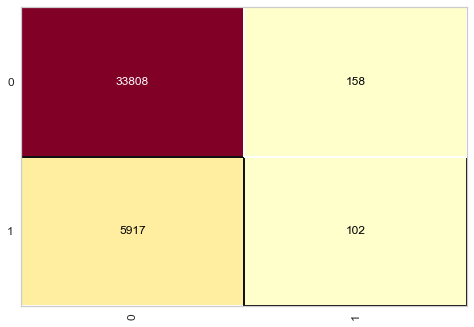

In [51]:
cm = ConfusionMatrix(model_rfc, classes = [0,1])

cm.fit(x_train, y_train)
cm.score(x_train, y_train)

# [[TN  FP]
# [FN  TP]]

### Checking Testing accuracy


In [47]:
# already created the instance of RandomForestClassifier
y_pred_test = model_fit_predict(model_rfc, x_test, y_test, x_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.94, 1.0 and 0.72 respectively


0.9359807942382715

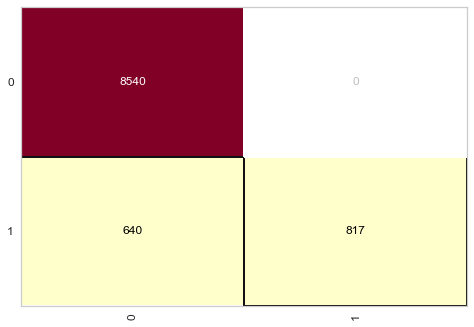

In [50]:
cm = ConfusionMatrix(model_rfc, classes=[0,1])
cm.fit(x_train, y_train)

cm.score(x_test, y_test)